In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset
data = pd.read_csv(r"D:\Assignments\Clustering\EastWestAirlines.csv")
data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
from scipy import stats

In [13]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Remove outliers
z_scores = np.abs(stats.zscore(data_imputed))
data_no_outliers = data_imputed[(z_scores < 3).all(axis=1)]

# Scale features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_outliers)



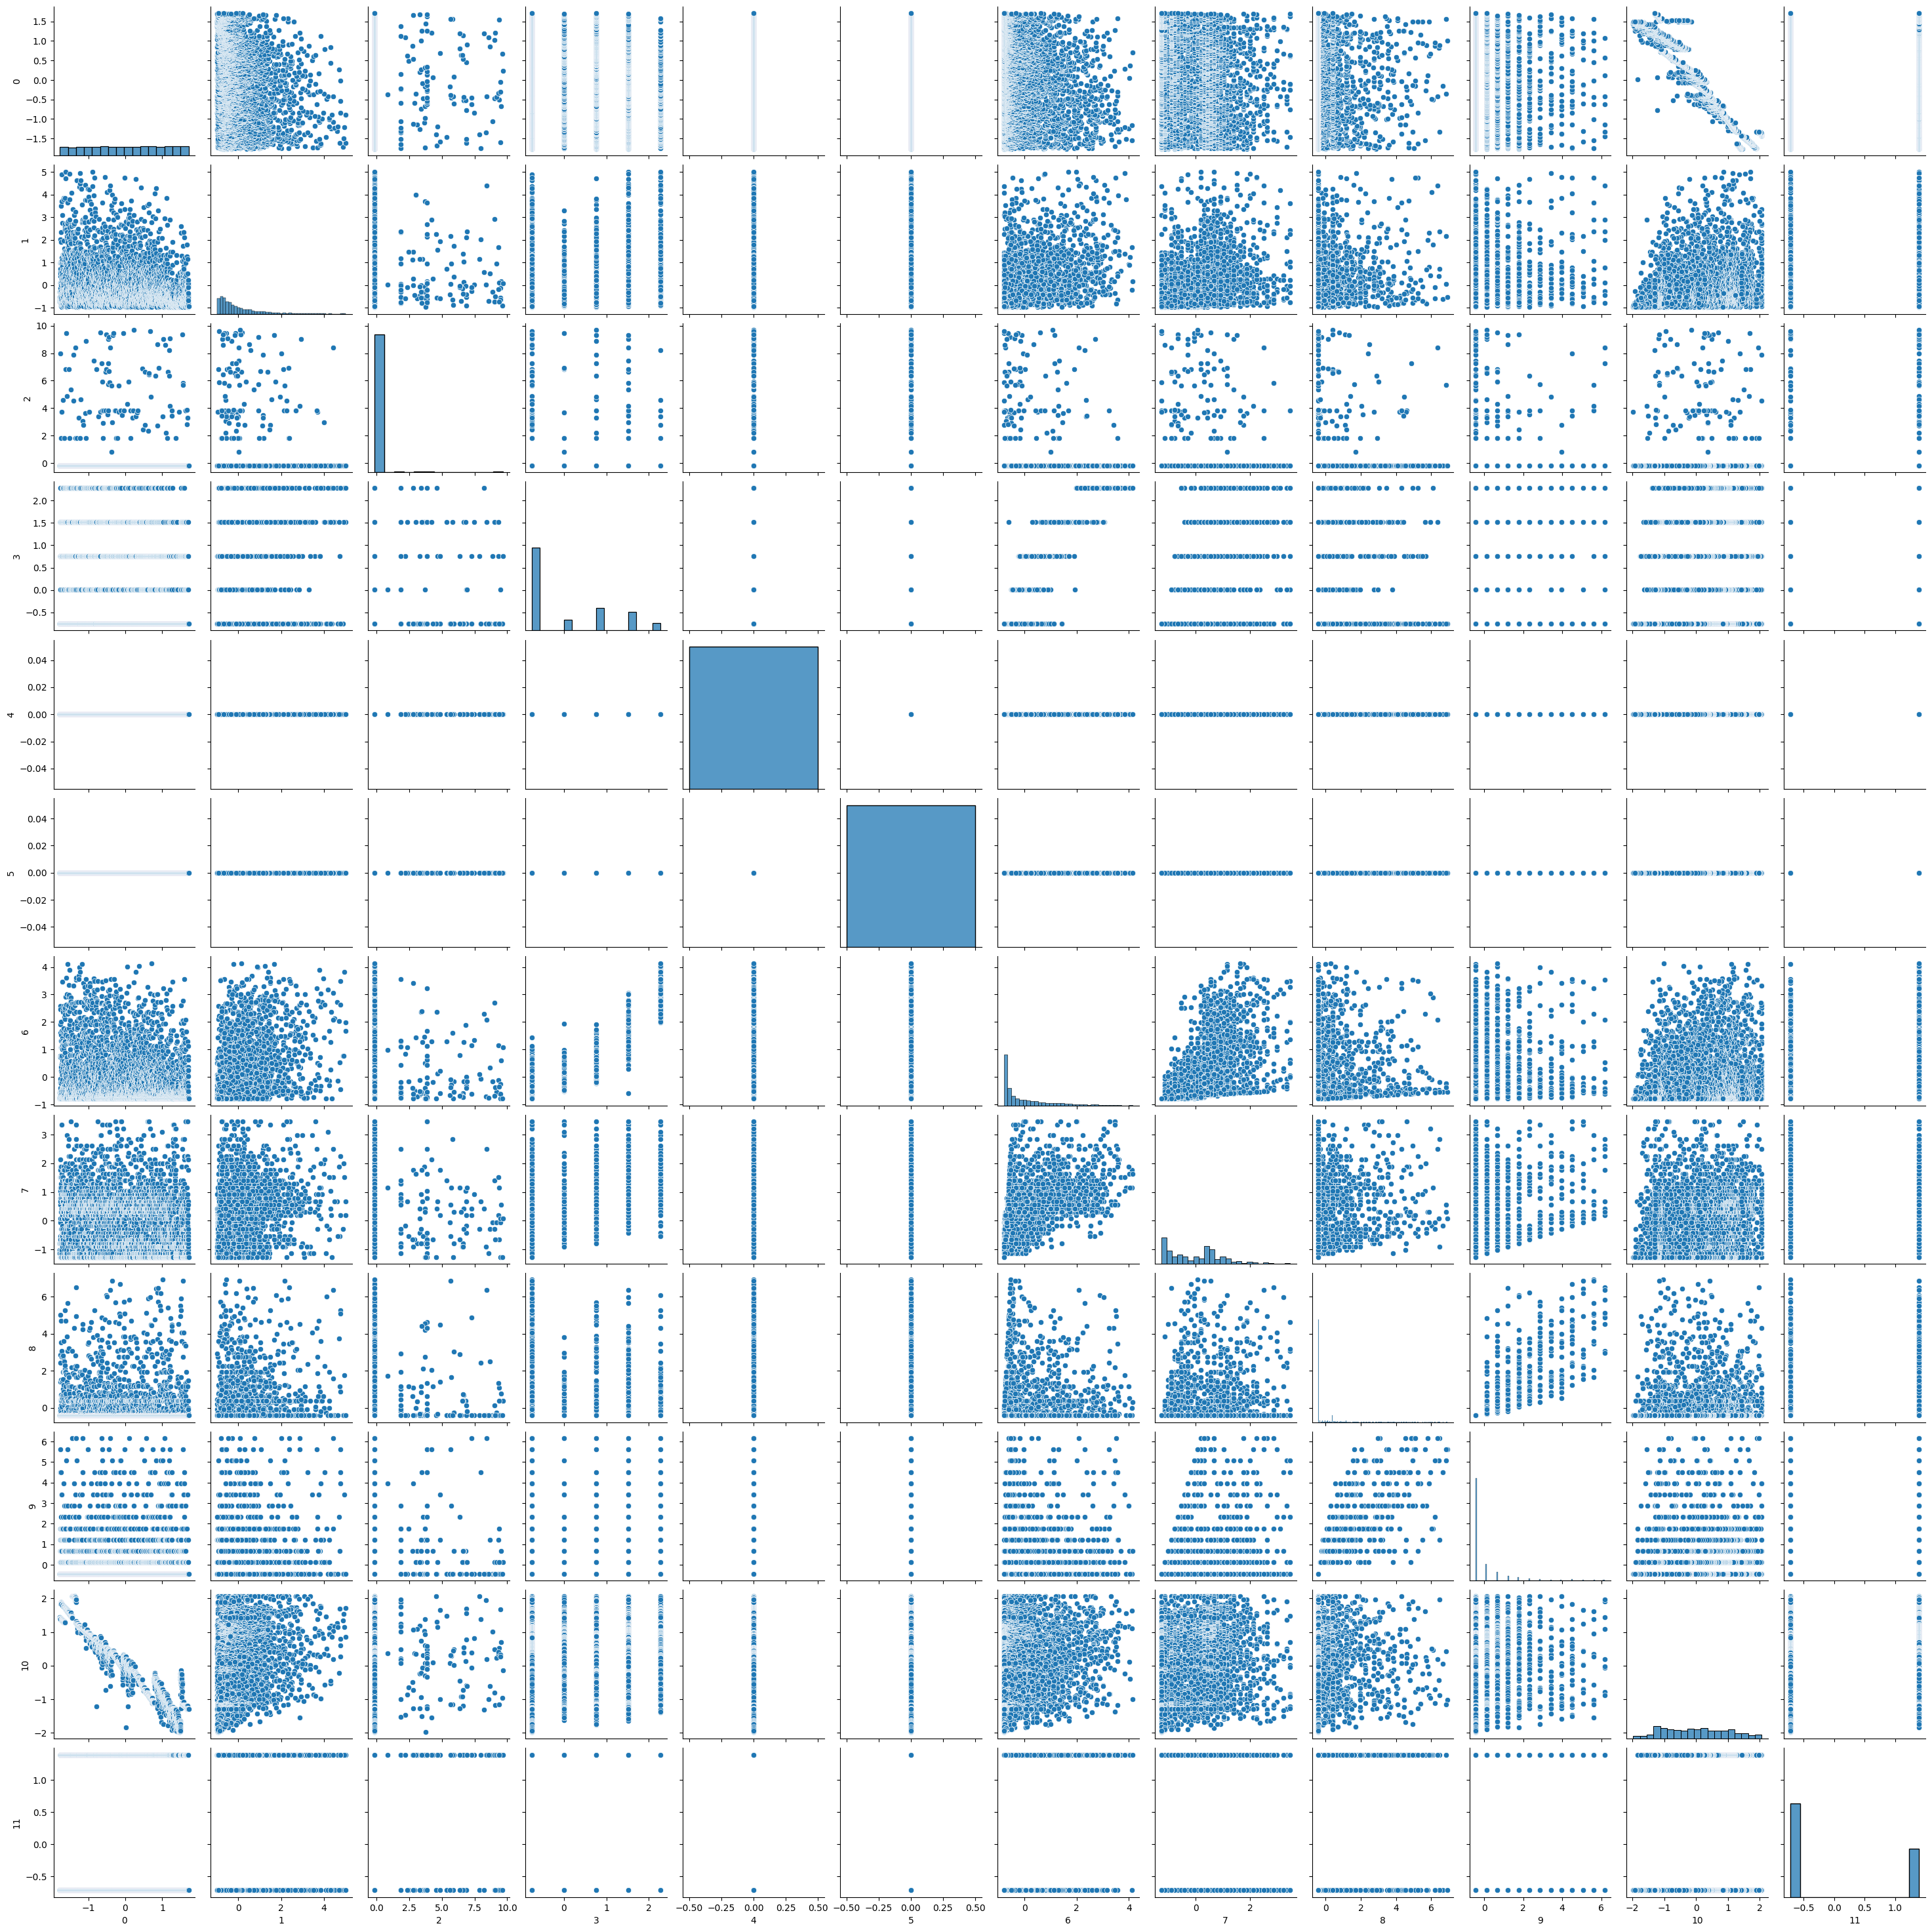

In [14]:
# EDA
sns.pairplot(pd.DataFrame(data_scaled))
plt.show()


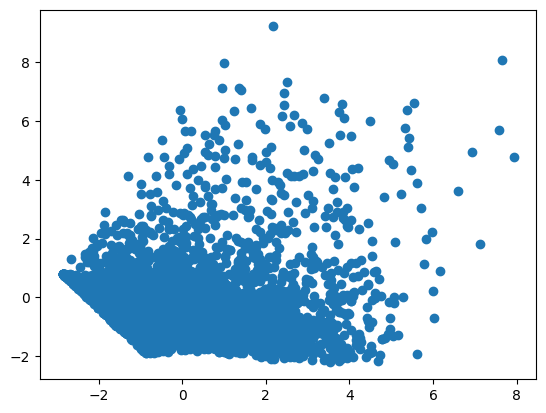

In [15]:
# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

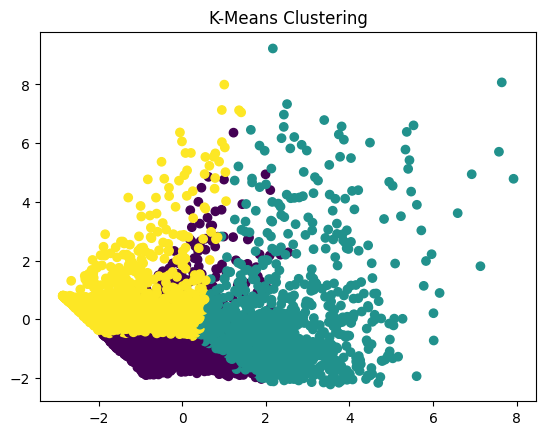

Silhouette Score for K-Means:  0.21610913907304058


In [16]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()
print("Silhouette Score for K-Means: ", silhouette_score(data_scaled, kmeans_labels))



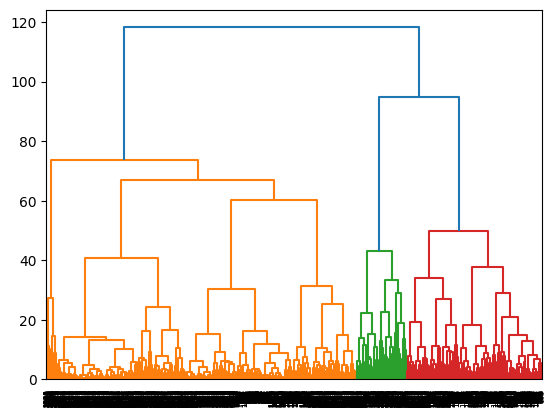

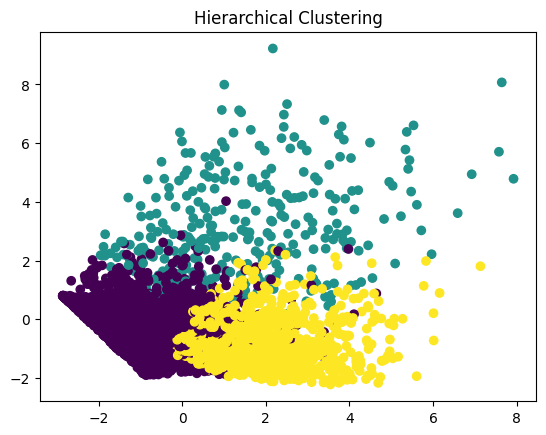

In [17]:
# Hierarchical Clustering
linked = linkage(data_scaled, 'ward')
dendrogram(linked)
plt.show()
hier_labels = fcluster(linked, 3, criterion='maxclust')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hier_labels)
plt.title('Hierarchical Clustering')
plt.show()


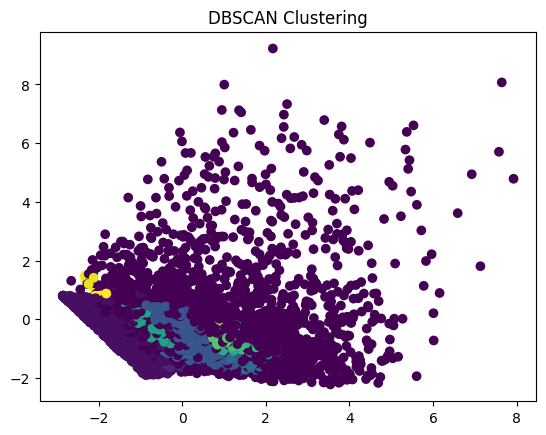

Silhouette Score for DBSCAN:  -0.39945523129809973


In [18]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()
print("Silhouette Score for DBSCAN: ", silhouette_score(data_scaled, dbscan_labels))